In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [173]:
df = pd.read_csv('4.2-economic_index.csv')

In [174]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [175]:
### Drop unnecessary column
df.drop(columns=['Unnamed: 0', 'year', 'month'], axis=1, inplace=True)

In [176]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [177]:
### Check null values
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

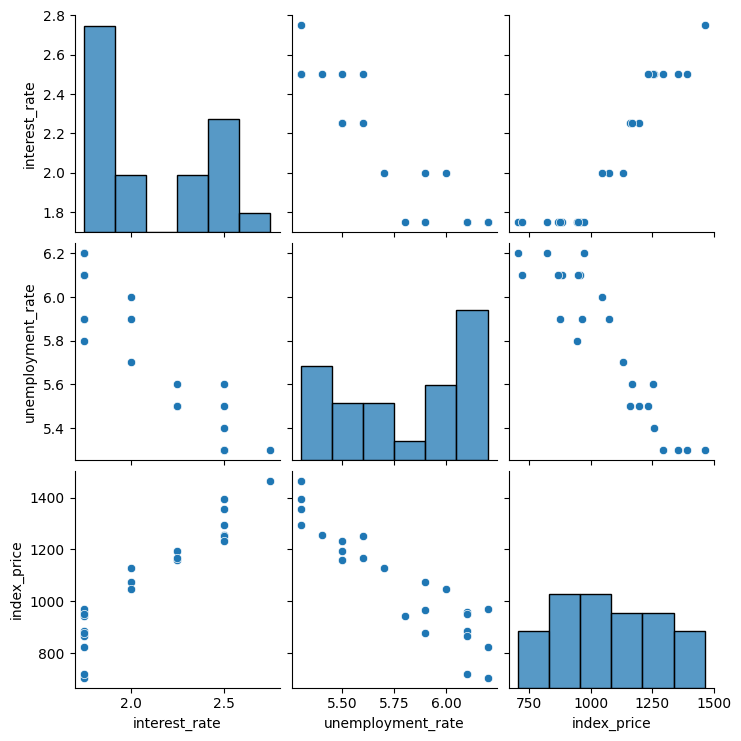

In [178]:
### Lets do some visualization
sns.pairplot(df)

In [179]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment rate')

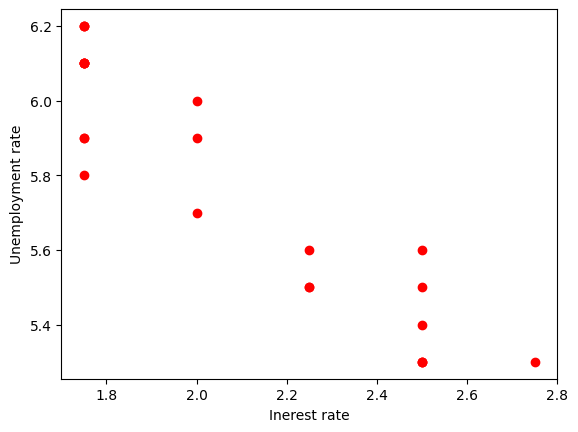

In [180]:
### Visualize the data points more closely
plt.scatter(df['interest_rate'], df['unemployment_rate'], c='r')
plt.xlabel('Inerest rate')
plt.ylabel('Unemployment rate')

In [181]:
### Independent and dependent feature

# x = df[['index_price', 'unemployment_rate']]    
# Another way

x = df.iloc[:, : -1]
y = df.iloc[:, -1]

In [182]:
x.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [183]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [184]:
### Train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=42)

In [185]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((18, 2), (6, 2), (18,), (6,))

<Axes: xlabel='interest_rate', ylabel='index_price'>

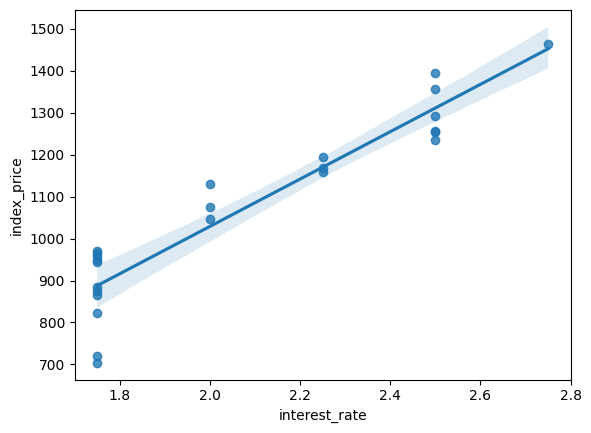

In [186]:
### To plot a data in a linear regression model fit we can use regression plot of seaborn
### But we cannot do this for more than two features. i.e. we cannot basically create a 3D plot.
sns.regplot(x=df['interest_rate'], y=df['index_price'], data=df)

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

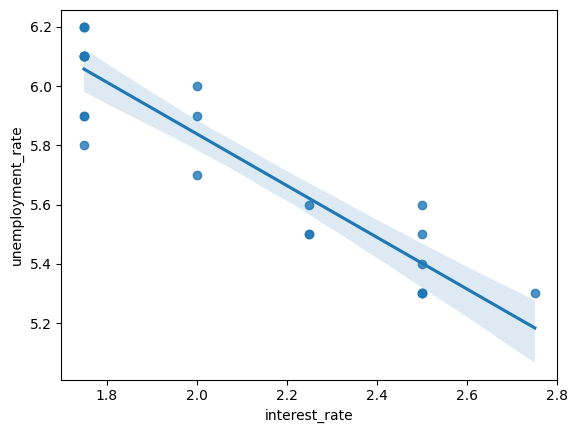

In [187]:
sns.regplot(x=df['interest_rate'], y=df['unemployment_rate'], data=df)

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

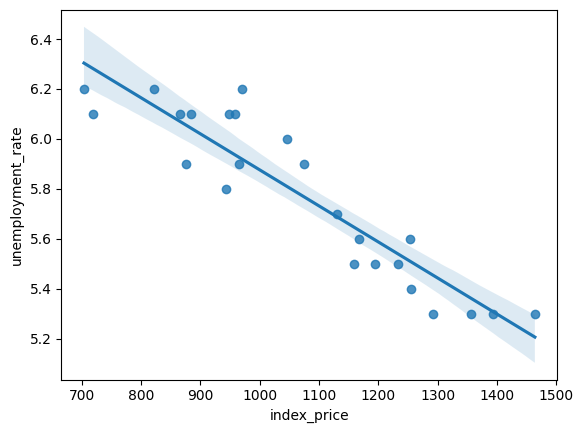

In [188]:
sns.regplot(x=df['index_price'], y=df['unemployment_rate'], data=df)

In [189]:
### Standardization
from sklearn.preprocessing import StandardScaler

In [190]:
scaler = StandardScaler()

In [191]:
x_train = scaler.fit_transform(x_train) ## it converts this into a two dimensional array
x_test = scaler.fit_transform(x_test)

In [192]:
x_train, x_test

(array([[-0.90115511,  0.37908503],
        [ 1.31077107, -1.48187786],
        [-0.90115511,  1.30956648],
        [ 1.31077107, -0.55139641],
        [ 1.31077107, -1.48187786],
        [-0.16384638,  0.68924552],
        [-0.90115511,  0.999406  ],
        [ 1.31077107, -1.48187786],
        [ 1.31077107, -1.17171738],
        [-0.90115511,  1.30956648],
        [-0.90115511,  0.999406  ],
        [-0.90115511,  0.37908503],
        [-0.90115511,  0.999406  ],
        [ 0.57346234, -0.8615569 ],
        [-0.16384638, -0.24123593],
        [-0.90115511,  0.06892455],
        [-0.90115511,  0.999406  ],
        [ 1.31077107, -0.8615569 ]]),
 array([[ 0.36115756, -0.82078268],
        [-1.08347268,  1.33377186],
        [ 1.8057878 , -1.43636969],
        [-1.08347268,  1.02597835],
        [-0.36115756,  0.41039134],
        [ 0.36115756, -0.51298918]]))

In [193]:
### Model training
from sklearn.linear_model import  LinearRegression

In [194]:
regression = LinearRegression()

In [195]:
regression.fit(x_train, y_train)

LinearRegression()

In [196]:
print("Coefficient or Slope:", regression.coef_)
print("Intercept:", regression.intercept_)

Coefficient or Slope: [  88.27275507 -116.25716066]
Intercept: 1053.4444444444443


In [197]:
### Cross Validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression, x_train, y_train, scoring='neg_mean_squared_error', cv=3)

In [198]:
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [199]:
np.mean(validation_score)

np.float64(-5914.828180162386)

In [200]:
### Prediction
y_pred = regression.predict(x_test)

In [201]:
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [202]:
### Performance metrix
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [203]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("Root Mean Squared Error: ", rmse)

Mean Squared Error:  8108.567426306604
Mean Absolute Error:  73.80444932337097
Root Mean Squared Error:  90.04758423359621


In [204]:
### R Square
from sklearn.metrics import r2_score

In [205]:
score = r2_score(y_test, y_pred)
score

0.7591371539010257

In [206]:
### Adjusted R Square
n = len(y_test)
k = x_test.shape[1]

adusted_score = 1 - (1-score)*(n - 1)/(n-k-1)
adusted_score

0.5985619231683761

### Assumptions

In [207]:
#### Here y_test and y_pred follows the linear relationship means the model is performing will

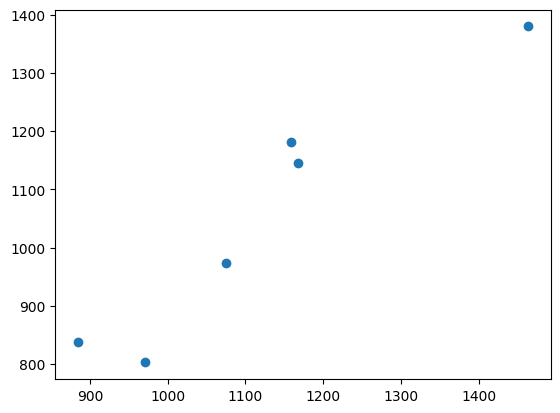

In [208]:
plt.scatter(y_test, y_pred)

In [209]:
### calculate the residuals
residuals = y_test - y_pred
residuals

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64

In [210]:
### Here we get the normal distributed curve i.e. our model is performing well

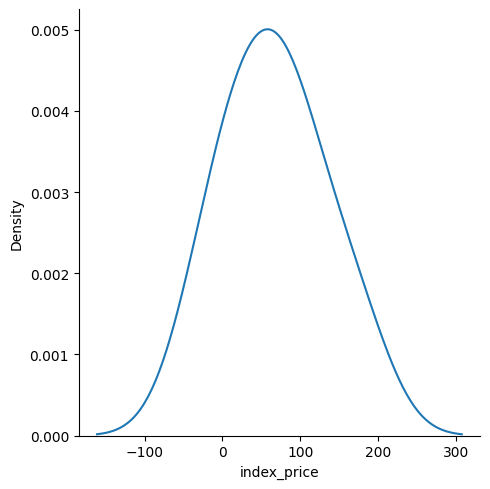

In [211]:
### Plot the residuals
sns.displot(residuals, kind='kde')

In [212]:
### Here the data is uniformly distributed i.e. it does not follow any pattern

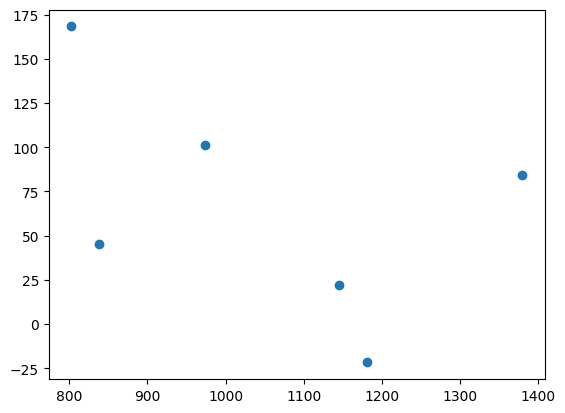

In [170]:
### scatter plot w.r.to prediction and residuals
plt.scatter(y_pred, residuals)

In [213]:
regression.coef_

array([  88.27275507, -116.25716066])